In [29]:
#import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

#import API key
from apikey import apikey
tempunit = "imperial"

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#range of latitudes and longitudes
latrange = (-90, 90)
lngrange = (-180, 180)

#define url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={apikey}&units={tempunit}&q="

#define counters
counter = 0
setter = 1

In [30]:
#list for holding lat/long and cities
latlong = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
latlong = zip(lats, longs)

#identify nearest city for each lat, lng combination
for latlon in latlong:
    city = citipy.nearest_city(latlon[0], latlon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

640

In [ ]:
#set lists for the dataframe
cityname = []
cloudinesses = []
dates = []
humidities = []
lats = []
longs = []
maxtemp = []
windspeed = []
countries = []

#set initial counters
counter = 0
setter = 1

#for loop to create dataframe
print("Beginning Data Retrieval\n------------------------------")
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        if counter > 48:
            counter = 1
            setter += 1
            cityname.append(city)
        else:
            counter += 1
            cityname.append(city)
        print(f"Processing Record {counter} of Set {setter} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | urumqi
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | chipinge
Processing Record 6 of Set 1 | lata
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | vestmannaeyjar
City not found. Skipping...
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | vanavara
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | cockburn town
Processing Record 21 of Set 1 | carupano
Processing Record 22 of Set 1 | esperance
Processing Recor

Processing Record 36 of Set 4 | mangalam
Processing Record 37 of Set 4 | shaowu
Processing Record 38 of Set 4 | geraldton
Processing Record 39 of Set 4 | alugan
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | catabola
Processing Record 42 of Set 4 | port macquarie
Processing Record 43 of Set 4 | miguel alves
Processing Record 44 of Set 4 | stornoway
Processing Record 45 of Set 4 | faanui
City not found. Skipping...
Processing Record 46 of Set 4 | chumikan
Processing Record 47 of Set 4 | katsuura
Processing Record 48 of Set 4 | izhma
Processing Record 49 of Set 4 | agadez
Processing Record 1 of Set 5 | christchurch
Processing Record 2 of Set 5 | vila
Processing Record 3 of Set 5 | tanout
Processing Record 4 of Set 5 | nyurba
Processing Record 5 of Set 5 | sirjan
Processing Record 6 of Set 5 | tukrah
Processing Record 7 of Set 5 | avallon
Processing Record 8 of Set 5 | porto novo
Processing Record 9 of Set 5 | zhezkazgan
Processing Record 10 of Set 5 | pevek
Processi

Processing Record 26 of Set 8 | bishop auckland
Processing Record 27 of Set 8 | kushikino
Processing Record 28 of Set 8 | ankang
Processing Record 29 of Set 8 | chapais
Processing Record 30 of Set 8 | vilya
Processing Record 31 of Set 8 | polunochnoye
Processing Record 32 of Set 8 | kalabo
Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | arlit
Processing Record 35 of Set 8 | lazaro cardenas
Processing Record 36 of Set 8 | domat
City not found. Skipping...
Processing Record 37 of Set 8 | boditi
Processing Record 38 of Set 8 | goderich
Processing Record 39 of Set 8 | smirnykh
Processing Record 40 of Set 8 | shenjiamen
Processing Record 41 of Set 8 | chunoyar
Processing Record 42 of Set 8 | nurobod
Processing Record 43 of Set 8 | santa maria
Processing Record 44 of Set 8 | puerto el triunfo
Processing Record 45 of Set 8 | mangrol
Processing Record 46 of Set 8 | kuppam
City not found. Skipping...
Processing Record 47 of Set 8 | verkh-usugli
Processing Record 48 

In [ ]:
# convert raw data to dataFrame
# create a dictionary for establishing dataframe
weather_dict = {
    "City":cityname,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":longs,
    "Max Temp":maxtemp,
    "Wind Speed":windspeed
}

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)
# output data to csv
outputcsv = "outputdata.csv"
weather_dataframe.to_csv(outputcsv)
weather_dataframe

In [ ]:
#weather count
weather_dataframe.count()

In [ ]:
#latitude vs. temperature plot
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("temperature.png")
plt.show()

In [ ]:
#latitude vs. humidity plot
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("humidity.png")
plt.show()

In [ ]:
#latitude vs. cloudiness plot
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("cloudiness.png")
plt.show()

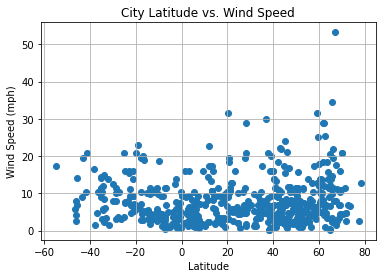

In [27]:
#latitude vs. wind speed plot
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("windspeed.png")
plt.show()